In [1]:
import numpy as np 
import pandas as pd 

from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)

import warnings
warnings.simplefilter(action='ignore')

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/abdullabasim/dataset/main/car_evaluation.csv", header=None)


In [3]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']


data.columns = col_names

In [4]:
data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [5]:
from sklearn.preprocessing import OrdinalEncoder


encoder = OrdinalEncoder()

data = encoder.fit_transform(data)

data = pd.DataFrame(data, columns = col_names)

In [6]:
X = data.drop(['class'], axis=1)

y = data['class']

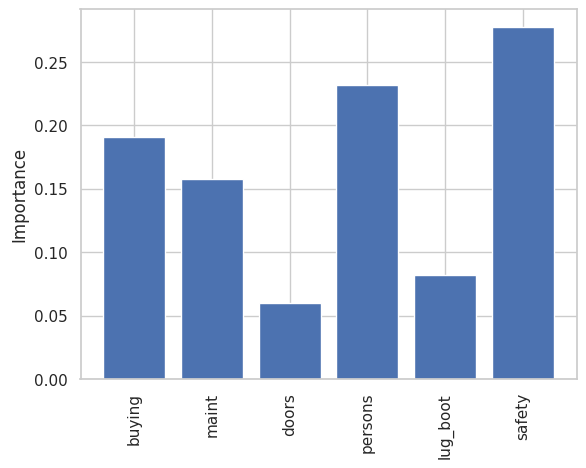

In [8]:
from sklearn.ensemble import RandomForestClassifier

# Create a random forest classifier object
rfc = RandomForestClassifier()

# Train the model
rfc.fit(X, y)

# Get the feature importance scores
importance_scores = rfc.feature_importances_

# Plot the feature importance scores
plt.bar(X.columns, importance_scores)
plt.xticks(rotation=90)
plt.ylabel('Importance')
plt.show()


In [10]:
from sklearn.inspection import permutation_importance

# Get the permutation feature importance scores
importance_scores = permutation_importance(rfc, X, y)

# Print the feature importance scores
for i in range(X.shape[1]):
    print(f"{X.columns[i]} importance: {importance_scores.importances_mean[i] * 100} ")

buying importance: 19.0625 
maint importance: 16.875 
doors importance: 4.675925925925927 
persons importance: 21.192129629629626 
lug_boot importance: 10.462962962962962 
safety importance: 26.95601851851852 
